<img src='./img/banner.png' align='right' width='100%'></img>

<div class="alert alert-block alert-success">
<b>PREREQUISITE </b>
    
* It is expected for user to be familiar with Python.
* LSA SAF **MLST** product data for 21 August 2023 at 12:00 needs to be downloaded from [LSA SAF Data server](https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/)
</div>

<hr>

# Analysing Uncertainty of LSA SAF MLST Product

#### About

Meteosat Land Surface Temperature ([MLST](https://lsa-saf.eumetsat.int/en/data/products/land-surface-temperature-and-emissivity/)) is a LSA SAF product that estimates Land Surface Temperature (LST) based on measurements with the Spinning Enhanced Visible and InfraRed Imager (SEVIRI) on board of the Meteosat Second Generation (MSG) satellite. The spatial resolution of SEVIRI measurements is 3 $\times$ 3 km directly under the satellite, while it increases towards the edge of the Earth disk. 

Estimates of MLST are calculated using top of atmosphere (TOA) brightness temperature at 10.8 $\mu m$ and 12.0 $\mu m$ bands. The methodology is based on a generalized split-window (GSW) algorithm. A detailed description is available [here](https://doi.org/10.1029/2008JD010035). 

The MLST product is only calculated over land. Furthermore, it is not calculated over cloud-covered areas. MLST estimates are also affected by the geographical location and local weather. MLST product is available together with the standard error and qualitative information about quality, the so-called quality flag. 

#### Basic facts on LST data 

 > **Spatial resolution**: 3km at nadir 
 >
 > **Spatial coverage**: MSG and IODC disk 
 >
 > **Time steps**: 15 min  
 >
 > **Data availability**: from 2005 
 >

#### How to access the data

For this example, MLST measurements from August 21, 2023, at 12:00 UTC are used. All measurements are available as NetCDF4 as well as HDF5 files, but only the former will be used here. The LSA SAF products files can be downloaded from the [data server](https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/) available at https://datalsasaf.lsasvcs.ipma.pt/ with prior registration.

Data can be downloaded in various ways, for instance manually, using approach published on [lsasaf_data_access GitLab](https://gitlab.com/helpdesk.landsaf/lsasaf_data_access/-/blob/main/examples/webdav/webdav_colab_example.ipynb) repository or using [WebDAV protocol](https://gitlab.com/helpdesk.landsaf/lsasaf_data_access/-/wikis/data/webdav). An additional option is to use the `GNU Wget` program. An example command is presented:

```bash
wget -m -np -nH https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MLST/NETCDF/2023/08/21/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202308211200.nc
--user=<USERNEAME> --password=<PASSWORD> --cut-dirs=7
```

`<USERNAME>` and `<PASSWORD>` need to be replaced with the credentials obtained in the registration process described above. In this notebook, it is assumed that the required file `NETCDF4_LSASAF_MSG_LST_MSG-Disk_202308211200.nc` is already available locally in the same directory as this notebook.

#### Module outline:
* [1 - Plotting over user-defined area](#First)
* [2 - Investigating the data quality](#Second)
* [3 - Conclusion](#Third)


<hr>

#### Load required libraries

We start by importing the necessary libraries. Furthermore, we can set the default plotsize using `plt.rcParams['figure.figuresize']` to obtain larger visible plots. The `%matplotlib inline` magic command is Jupyter-specific and used to show plots directly within the notebook interface.

In [1]:
import numpy as np                     # a library that supports numerical calculations with multidimensional arrays
import xarray as xr                    # a library for  handling labeled, multi-dimensional datasetst (NetCDF4 files) 
import cartopy.crs as ccrs             # a library that supports mapping and projections for plotting 
import cartopy.feature as cf           # a cartopy extension that supports adding features like rivers, borders etc.
import matplotlib as mpl               # a library for creating plots and visualizations
import matplotlib.pyplot as plt        # a library for creating plots and visualizations
import matplotlib.patches as mpatches  # a matplotlib extension that supports plotting, creating and manipulating graphical patches

# Set the matplotlib backend to inline
%matplotlib inline

# Set the default figure size
plt.rcParams['figure.figsize'] = [13, 8]

### <a id='First'></a>1. Plotting over user-defined area

We usually don't visualize the MLST data over the full MSG disk, but rather over user-defined areas of interest. For the purpose of this notebook, our area of interest is Italy and parts of the Southeastern Europe region. After opening the data, we can use the `dataset.sel()` method.

We create a new dataset that contains the data of our choice. This could be done at the beginning, by loading only a part of the NetCDF4 file as our dataset. This is a recommended practice from the memory-saving perspective.

We define a subset of the NetCDF4 file and then load it:

In [2]:
# Define the dataset
ds=xr.open_dataset("NETCDF4_LSASAF_MSG_LST_MSG-Disk_202308211200.nc")

# Select a sub-dataset
""" Slice boundaries must be in the same order as in the dataset
 (lat: MAX-MIN, lon: MIN-MAX))
"""
ds_slice=ds.sel(lat=slice(47, 36), lon=slice(5, 21))

We can then continue with the plot custumatization. We can set the range of the plot with `ax.set_extent`. Bear in mind, that the area shown in projections other than `PlateCarre` isn't a perfect rectangle. Therefore, there might be an area with no values at the edge of the figure, which is not aesthetically pleasing. One can avoid that by choosing a larger area (in this case 1° on each side), and then setting the extent with the `ax.set_extent` command.

Text(0.5, 1.0, 'Land Surface Temperature (LST) 21.8.2023 12:00 UTC')

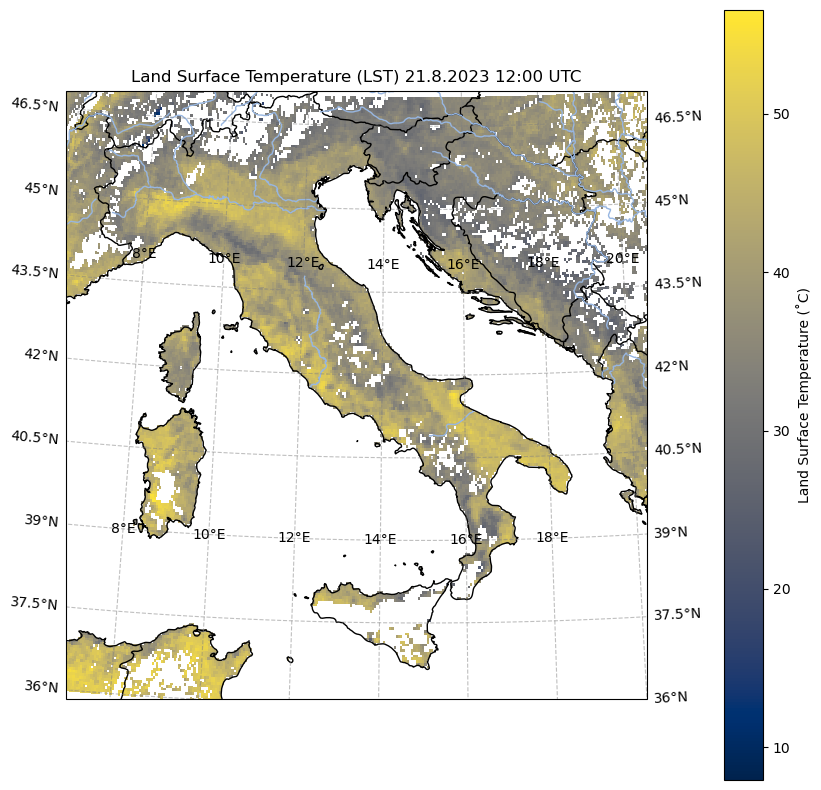

In [3]:
# Define plot projection
choosen_projection=ccrs.LambertConformal(central_longitude=15.0,
                                         central_latitude=42.0)

# Set fig, axes
fig, ax = plt.subplots(subplot_kw={'projection': choosen_projection},
                       figsize=(10, 10))

# Plot the data
img=ds_slice.LST.plot(ax=ax, transform=ccrs.PlateCarree(),
                      cmap="cividis", add_colorbar=False)

# Add features to the map
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.RIVERS)
ax.gridlines(draw_labels=True, linestyle='--',
             color='gray', alpha=0.5)
ax.coastlines()

# Set extent (plot range)
ax.set_extent([7,20,36, 46.9], crs=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation='vertical',
                    pad=0.1, label="Land Surface Temperature (˚C)")

# Add title
plt.title("Land Surface Temperature (LST) 21.8.2023 12:00 UTC")

# Figure can be saved with (uncoment)
#plt.savefig("img/lst_Italy.png)

### <a id='Second'></a> 2. Investigating standard error and quality flag

Standard error data are calculated as root-mean-square-error between satellite and in-situ data. More info on that can be found in the verification report ([VR](https://nextcloud.lsasvcs.ipma.pt/s/Dd6ga76oG7Lqz5Q?path=%2FPUM)).

In addition to LST estimates, the MLST product also provides standard error estimates. We can plot standard error with a similar approach as in the previous plot.

Text(0.5, 1.0, 'Land Surface Temperature (LST) Standard Error 21.8.2023 12:00 UTC')

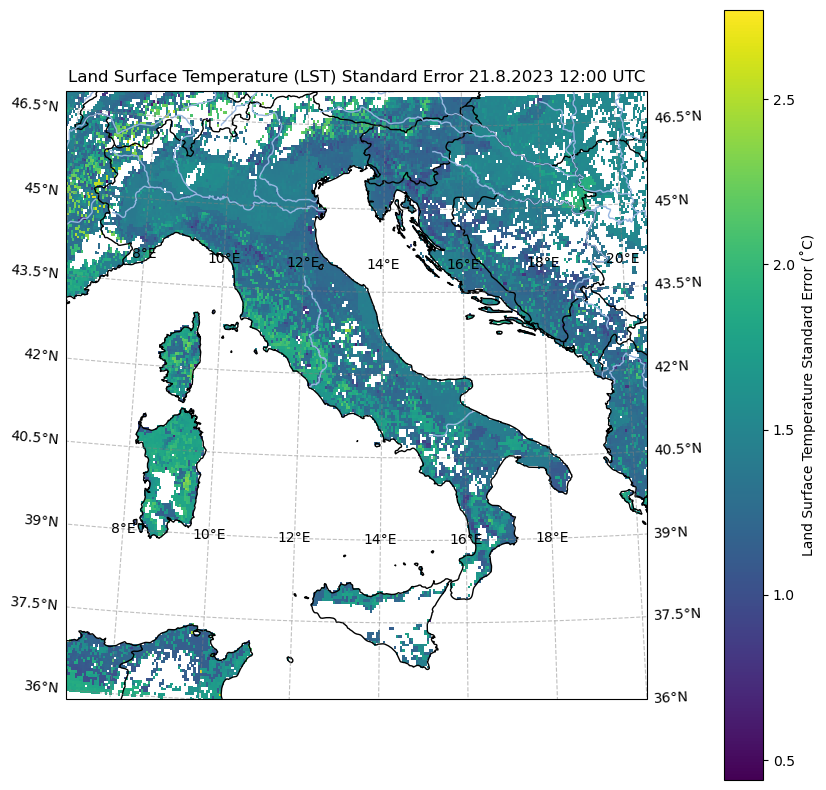

In [4]:
# Define plot projection
choosen_projection=ccrs.LambertConformal(central_longitude=15.0,
                                         central_latitude=42.0)

# Set fig, axes
fig, ax = plt.subplots(subplot_kw={'projection': choosen_projection},
                       figsize=(10, 10))

# Plot the data
img=ds_slice.standard_error.plot(ax=ax, transform=ccrs.PlateCarree(),
                                 cmap="viridis", add_colorbar=False)

# Add features to the map
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.RIVERS)
ax.gridlines(draw_labels=True, linestyle='--',
             color='gray', alpha=0.5)
ax.coastlines()

# Set extent (plot range)
ax.set_extent([7,20,36, 46.9], crs=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation='vertical',
                    pad=0.1, label="Land Surface Temperature Standard Error (˚C)")

# Add title
plt.title("Land Surface Temperature (LST) Standard Error 21.8.2023 12:00 UTC")

# Figure can be saved with (uncoment)
#plt.savefig("img/lst_Italy_standard_error.png)

As seen in the figure, LST is not available over all Earth surfaces, e.g., due to cloud cover.

A better understanding of the quality and availability of the data can be achieved by investigating quality flags. For each pixel, it indicates if LST is estimated and if so, what is the quality of the estimation. The quality flag is coded as a 2-byte signed integer (3-digit decimal value representation is used here).

Quality flag encoding is described in the LST Product User Manual (PUM) available [here](https://nextcloud.lsasvcs.ipma.pt/s/zXJoeTf6HByE6RP?dir=undefined&path=%2FMLST%2FPUM&openfile=27289).

In the following cell, quality flag definitions are rewritten from LST PUM in the same order.

In [5]:
# Quality flag decimal representations

values=np.array([
    0, 10, 200, 110, 100,
    101, 102, 103, 310,
    300, 301, 302, 303## References:

])

# Quality flag descriptions
descriptions=[
    "Sea pixel, clear-sky, unprocessed",
    "Sea pixel, cloudy-sky, unprocessed",
    "Out of disk, unprocessed",
    "Land pixel, cloudy-sky, unprocessed",
    "Land pixel, clear-sky, unprocessed",
    "Land pixel, clear-sky, above nominal quality",
    "Land pixel, clear-sky, nominal quality",
    "Land pixel, clear-sky, below nominal quality",
    "Inland water pixel, cloudy-sky, unprocessed",
    "Inland water pixel, clear-sky, unprocessed",
    "Inland water pixel, clear-sky, above nominal quality",
    "Inland water pixel, clear-sky, nominal quality",
    "Inland water pixel, clear-sky, below nominal quality"
]

In order to color all possible quality flags, we need 13 distinctive colors. Multiple schemes for distinguishable coloring of the data are available, the ["Kelly colors"](https://eleanormaclure.files.wordpress.com/2011/03/colour-coding.pdf) scheme was used here. Available colors in the hexadecimal encoding are listed below.

In [6]:
colors=[
    '#2B3D26', '#F2F3F4', '#222222', '#F3C300', '#875692',
    '#F38400', '#A1CAF1', '#BE0032', '#C2B280', '#848482',
    '#008856', '#E68FAC', '#0067A5', '#F99379', '#604E97',
    '#F6A600', '#B3446C', '#DCD300', '#882D17', '#8DB600',
    '#654522', '#E25822'
    ]

In order to plot the data with `imshow` or `pcolormesh` we need to have colormap instead of just a list of colors. Since all possible decimal values for the quality flag are known, a predefined custom colormap can be defined. 

Instead of a colorbar, we want a legend, which correlates color with the quality flag definitions. The approach from [Stack Overflow](https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib) was introduced here.

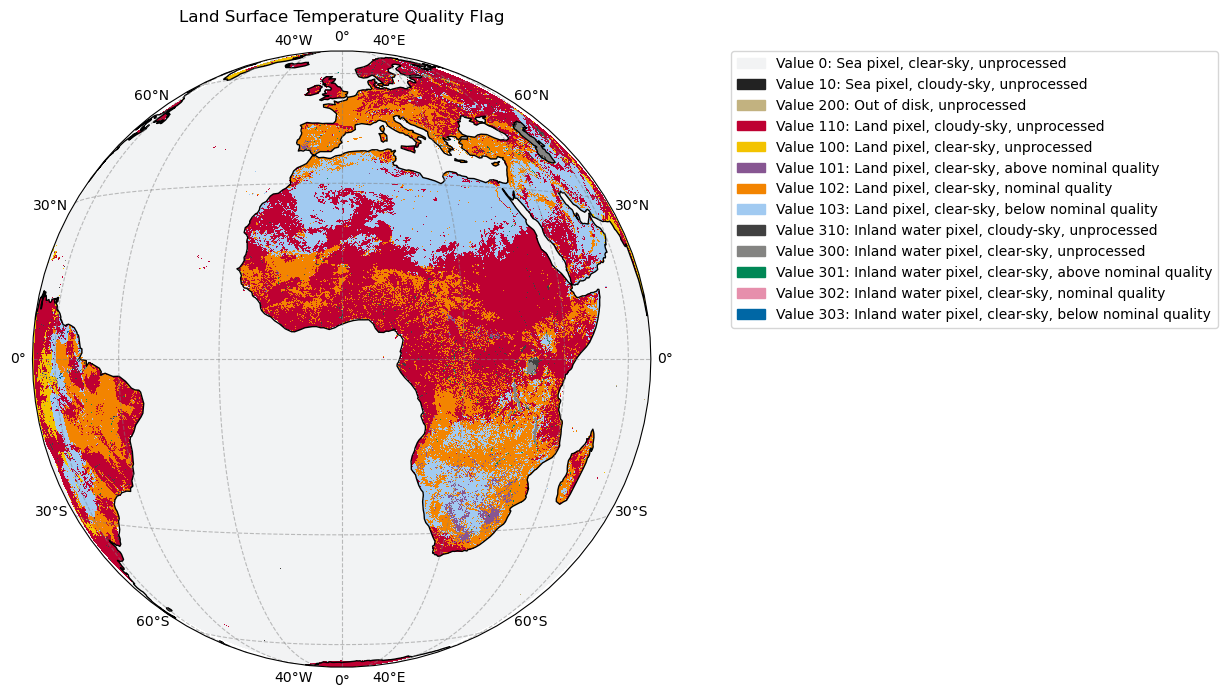

In [7]:
# Define quality flag sub-dataset
quality=ds.quality_flag.isel(time=0)

# Define plot projection
choosen_projection=ccrs.Geostationary()

# Define custom discrete colormap with known bounds
custom_cmap = (mpl.colors.ListedColormap(colors[0:len(values)])
               .with_extremes(over='0.25', under='0.75'))
bounds=np.append([-0.5], np.sort(values))
norm = mpl.colors.BoundaryNorm(bounds, custom_cmap.N)

# Set fig, axes
fig, ax = plt.subplots(subplot_kw={'projection': choosen_projection})

# Plot the data
img = quality.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                              cmap=custom_cmap, norm=norm, add_colorbar=False)

# Add features to the map
ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--',
             color='gray', alpha=0.5)

# Add title
plt.title("Land Surface Temperature Quality Flag")

# Add legend
colors = [ img.cmap(img.norm(value)) for value in values]
# Create a patch (proxy artist) for every color
patches = [ mpatches.Patch(color=colors[i],
                           label="Value {l}: "
                           .format(l=values[i]) + descriptions[i]) for i in range(len(values)) ]

# Put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.13, 1),
           loc=2, borderaxespad=0. )

# Figure can be saved with (uncoment)
#plt.savefig("img/lst_quality_flag.png)

### <a id='Third'></a>3. Conclusion

Opening and plotting of NetCDF4 LST files were presented. The `xarray` package provides a simple and easy-to-use framework for working with LSA SAF data. We examined the MLST product and plot values of LST and standard error on the predefined area of Italy and Sutheast Europe. Additionally, quality flag types were discussed and presented.


#### References:

* array Developers (2023). xarray User Guide. [https://docs.xarray.dev/en/stable/user-guide/index.html](https://docs.xarray.dev/en/stable/user-guide/index.html). Accesed: 20.11.2023.
* Met Office (2010-2015). Cartopy: a cartographic python library with a Matplotlib interface. [https://scitools.org.uk/cartopy](https://scitools.org.uk/cartopy). Accessed: 20.11.2023.
* Trigo, I. F., I. T. Monteiro, F. Olesen, and E. Kabsch (2008). An assessment of remotely sensed land surface temperature, J. Geophys. Res.,113, D17108, [doi:10.1029/2008JD010035](doi:10.1029/2008JD010035).
* P. Green-Armytage (2010). A Colour Alphabet and the Limits of Colour Coding, Colour: Desig. & Creat., 10. [https://eleanormaclure.files.wordpress.com/2011/03/colour-coding.pdf](https://eleanormaclure.files.wordpress.com/2011/03/colour-coding.pdf). Accessed: 20.11.2023.
* Some code was adapted from:  
    * origin: [https://stackoverflow.com/a/40666180](https://stackoverflow.com/a/40666180)
    * license: CC BY-SA 3.0
    * copyright:  Stack Exchange Inc.
    * retireved: 20.11.2023.